# Ettoday 網路爬蟲實作練習


* 能夠利用 Request + BeatifulSour 撰寫爬蟲，並存放到合適的資料結構


## 作業目標

根據範例：

1. 取出今天所有的新聞
2. 取出現在時間兩小時內的新聞
3. 根據範例，取出三天前下午三點到五點的新聞

## 1. 取出今天所有的新聞

In [28]:
'''
Your Code
'''
from datetime import datetime, timedelta

TodayTime = datetime.now()
OneDayTime = timedelta(1)
YesterDayTime = TodayTime - OneDayTime
YesterDayDate = YesterDayTime.strftime('%Y/%m/%d')+' '+YesterDayTime.strftime('%H')
print(TodayTime)
print(TodayTime.strftime('%Y/%m/%d'), TodayTime.strftime('%H:%M:%S'))
print(YesterDayDate)

2020-02-06 01:19:20.341401
2020/02/06 01:19:20
2020/02/05 01


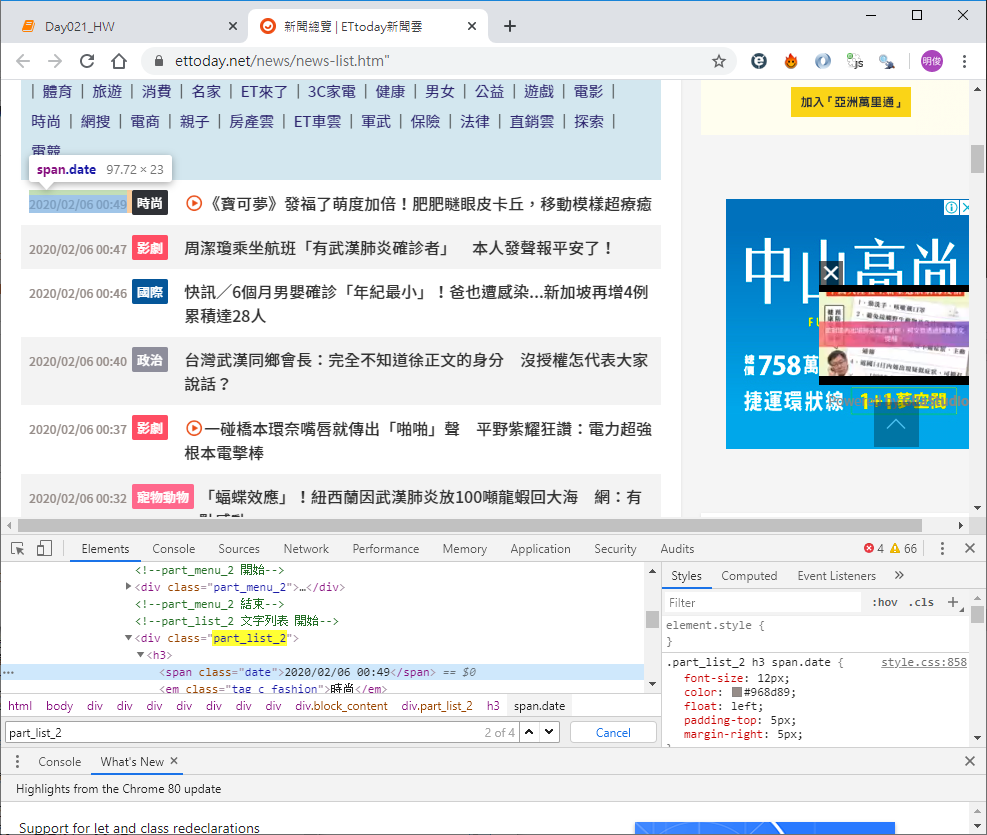

In [29]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time

browser = webdriver.Chrome(executable_path='chromedriver')
browser.get("https://www.ettoday.net/news/news-list.htm")

GetFinishFlag = 0
while GetFinishFlag:
    browser.execute_script("window.scrollTo(0, 100000);")
    time.sleep(2)
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, "html5lib")
    print(soup.find_all(class_="part_list_2")[-1].find_all('h3')[-1].find(class_="date").text)
    if YesterDayDate in soup.find_all(class_="part_list_2")[-1].find_all('h3')[-1].find(class_="date").text:
        GetFinishFlag = 1
        print('Finish !')
    else:
        GetFinishFlag = 0
    


In [30]:
html_source = browser.page_source
soup = BeautifulSoup(html_source, "html5lib")

for data in soup.find(class_="part_list_2").find_all('h3'):
    if YesterDayDate in data.find(class_="date").text :
        break
    else:
        pass
    print(data.find(class_="date").text, data.find_all('a')[-1].text)

2020/02/06 01:05 沒戴口罩逛市場！寧波男「15秒被感染」武漢肺炎　緊急公布接觸史
2020/02/06 00:49 《寶可夢》發福了萌度加倍！肥肥瞇眼皮卡丘，移動模樣超療癒
2020/02/06 00:47 周潔瓊乘坐航班「有武漢肺炎確診者」　本人發聲報平安了！
2020/02/06 00:46 快訊／6個月男嬰確診「年紀最小」！爸也遭感染...新加坡再增4例累積達28人
2020/02/06 00:40 台灣武漢同鄉會長：完全不知道徐正文的身分　沒授權怎代表大家說話？
2020/02/06 00:37 一碰橋本環奈嘴唇就傳出「啪啪」聲　平野紫耀狂讚：電力超強根本電擊棒
2020/02/06 00:32 「蝠蝶效應」！紐西蘭因武漢肺炎放100噸龍蝦回大海　網：有點感動
2020/02/06 00:23 安七炫公開新戀情　「車模前女友」IG湧入安慰私訊：別擔心，不用再傳了
2020/02/06 00:20 起底徐正文3背景！　台灣基進黨：眼淚滿滿中共味
2020/02/06 00:17 鑽石公主郵輪中鏢乘客「台北一日遊」　國賓：經查證並無進入用餐
2020/02/06 00:17 福山雅治也腐了！深陷BL「想換名字來演」　狂推神作《鳴鳥不飛》登上大銀幕
2020/02/06 00:16 證實搭鑽石公主號！　女星回家12天「正在自我隔離」：比較擔心其他乘客
2020/02/06 00:10 口罩實名制上路！中國大陸列紅色警示「全禁入境」　中港澳旅遊史居家檢疫14天
2020/02/06 00:04 快訊／機身「斷成兩截」！　土耳其伊斯坦堡客機衝出跑道
2020/02/06 00:04 高雄情人節約會新景點　25萬顆可控式LED燈打造130公尺星悅光廊
2020/02/05 23:56 《檢察官內傳》鄭麗媛DISS力度全開　「李善均採訪到要發火了」
2020/02/05 23:53 麗豐-KY去年EPS 18.02元　今年首重穩固店家向心力
2020/02/05 23:51 武漢肺炎曙光！俄羅斯透露「研發疫苗」光速時間表：先提供活病毒
2020/02/05 23:44 奧斯卡得獎名單「提前爆雷」　奉俊昊《寄生上流》勇奪4項...抱走最大獎！
2020/02/05 23:41 貿聯-KY元月營收年減17%　因應疫情成立「應急管理小組」
2020/02/05 

In [31]:
import pandas as pd

OneDayNews = []

for data in soup.find(class_="part_list_2").find_all('h3'):
    if YesterDayDate in data.find(class_="date").text :
        break
    OneDayNews.append({
        'Time': data.find(class_="date").text,
        'Title': data.find_all('a')[-1].text
    })

pd.DataFrame(OneDayNews)

,Time,Title
0,2020/02/06 01:05,沒戴口罩逛市場！寧波男「15秒被感染」武漢肺炎 緊急公布接觸史
1,2020/02/06 00:49,《寶可夢》發福了萌度加倍！肥肥瞇眼皮卡丘，移動模樣超療癒
2,2020/02/06 00:47,周潔瓊乘坐航班「有武漢肺炎確診者」 本人發聲報平安了！
3,2020/02/06 00:46,快訊／6個月男嬰確診「年紀最小」！爸也遭感染...新加坡再增4例累積達28人
4,2020/02/06 00:40,台灣武漢同鄉會長：完全不知道徐正文的身分 沒授權怎代表大家說話？
5,2020/02/06 00:37,一碰橋本環奈嘴唇就傳出「啪啪」聲 平野紫耀狂讚：電力超強根本電擊棒
6,2020/02/06 00:32,「蝠蝶效應」！紐西蘭因武漢肺炎放100噸龍蝦回大海 網：有點感動
7,2020/02/06 00:23,安七炫公開新戀情 「車模前女友」IG湧入安慰私訊：別擔心，不用再傳了
8,2020/02/06 00:20,起底徐正文3背景！ 台灣基進黨：眼淚滿滿中共味
9,2020/02/06 00:17,鑽石公主郵輪中鏢乘客「台北一日遊」 國賓：經查證並無進入用餐


## 2. 取出現在時間兩小時內的新聞

In [34]:
'''
Your Code
'''
TodayTime
TodayTimeOf2HrAgo = TodayTime - timedelta(hours=2)
print(TodayTimeOf2HrAgo)

NewsOf2HrAgo = []

for data in soup.find(class_="part_list_2").find_all('h3'):
    if datetime.strptime(data.find(class_="date").text, '%Y/%m/%d %H:%M') < TodayTimeOf2HrAgo:
        break
    
    NewsOf2HrAgo.append({
        'Time': data.find(class_="date").text,
        'Title': data.find_all('a')[-1].text
    })

pd.DataFrame(NewsOf2HrAgo)

2020-02-05 23:19:20.341401


,Time,Title
0,2020/02/06 01:05,沒戴口罩逛市場！寧波男「15秒被感染」武漢肺炎 緊急公布接觸史
1,2020/02/06 00:49,《寶可夢》發福了萌度加倍！肥肥瞇眼皮卡丘，移動模樣超療癒
2,2020/02/06 00:47,周潔瓊乘坐航班「有武漢肺炎確診者」 本人發聲報平安了！
3,2020/02/06 00:46,快訊／6個月男嬰確診「年紀最小」！爸也遭感染...新加坡再增4例累積達28人
4,2020/02/06 00:40,台灣武漢同鄉會長：完全不知道徐正文的身分 沒授權怎代表大家說話？
5,2020/02/06 00:37,一碰橋本環奈嘴唇就傳出「啪啪」聲 平野紫耀狂讚：電力超強根本電擊棒
6,2020/02/06 00:32,「蝠蝶效應」！紐西蘭因武漢肺炎放100噸龍蝦回大海 網：有點感動
7,2020/02/06 00:23,安七炫公開新戀情 「車模前女友」IG湧入安慰私訊：別擔心，不用再傳了
8,2020/02/06 00:20,起底徐正文3背景！ 台灣基進黨：眼淚滿滿中共味
9,2020/02/06 00:17,鑽石公主郵輪中鏢乘客「台北一日遊」 國賓：經查證並無進入用餐


## 3. 根據範例，取出三天前下午三點到五點的新聞

In [38]:
'''
Your Code
'''
ThreeDayTime = datetime.now() - timedelta(3)
ThreeDay_M = ThreeDayTime.strftime('%m')
ThreeDay_D = ThreeDayTime.strftime('%d')
print(f'3 Day Time = {ThreeDayTime}\n {ThreeDay_M}M {ThreeDay_D}D')

ThreeDayTime_3PM = ThreeDayTime.strptime(ThreeDayTime.strftime("%Y/%m/%d") + ' 15', '%Y/%m/%d %H')
ThreeDayTime_5PM = ThreeDayTime.strptime(ThreeDayTime.strftime("%Y/%m/%d") + ' 17', '%Y/%m/%d %H')
print(f'{ThreeDayTime_3PM}\n{ThreeDayTime_5PM}')

3 Day Time = 2020-02-03 01:44:45.739718
 02M 03D
2020-02-03 15:00:00
2020-02-03 17:00:00


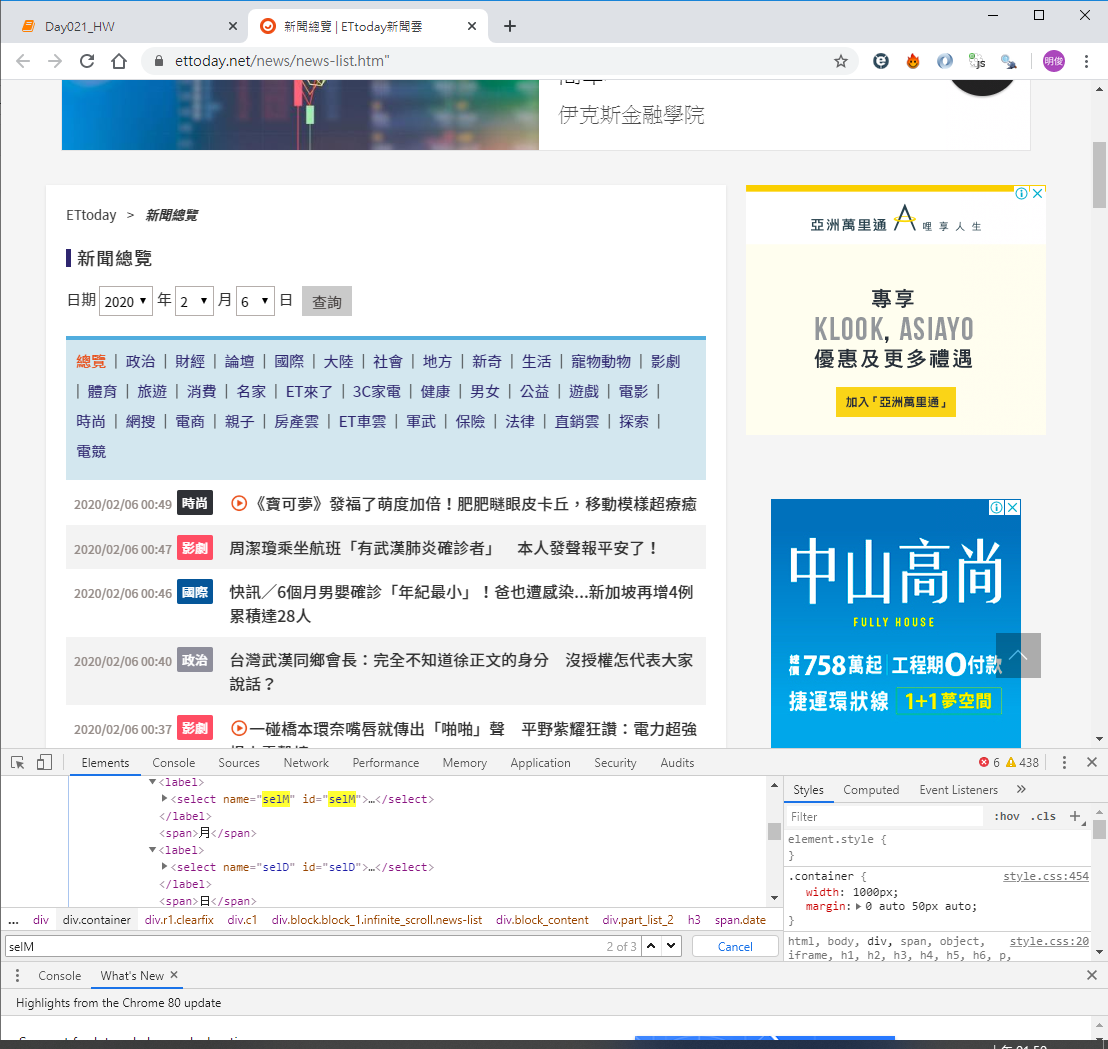

In [56]:
from selenium.webdriver.support.ui import Select

browser = webdriver.Chrome(executable_path='chromedriver')
browser.get("https://www.ettoday.net/news/news-list.htm")

Slect_M = Select(browser.find_element_by_id("selM"))
Slect_M.select_by_value('2')
Slect_D = Select(browser.find_element_by_id("selD"))
Slect_D.select_by_value('3')
browser.find_element_by_id('button').click()

In [57]:
while True:
    browser.execute_script("window.scrollTo(0, 100000);")
    time.sleep(1)
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, "html5lib")
    new_date = soup.find_all(class_="part_list_2")[-1].find_all('h3')[-1].find(class_="date").text
    print(new_date)
    if datetime.strptime(new_date, '%Y/%m/%d %H:%M') < ThreeDayTime_3PM:
        print('==== STOP ====')
        break
    

2020/02/03 19:24
2020/02/03 19:03
2020/02/03 18:52
2020/02/03 18:35
2020/02/03 18:28
2020/02/03 18:17
2020/02/03 18:05
2020/02/03 17:55
2020/02/03 17:48
2020/02/03 17:41
2020/02/03 17:35
2020/02/03 17:27
2020/02/03 17:16
2020/02/03 17:05
2020/02/03 16:55
2020/02/03 16:49
2020/02/03 16:41
2020/02/03 16:32
2020/02/03 16:21
2020/02/03 16:13
2020/02/03 16:03
2020/02/03 15:53
2020/02/03 15:33
2020/02/03 15:26
2020/02/03 15:12
2020/02/03 15:05
2020/02/03 14:57
==== STOP ====


In [58]:
news = []

for d in soup.find(class_="part_list_2").find_all('h3'):
    if datetime.strptime(d.find(class_="date").text, '%Y/%m/%d %H:%M') < ThreeDayTime_3PM:
        print('==== STOP ====')
        break
    
    if datetime.strptime(d.find(class_="date").text, '%Y/%m/%d %H:%M') < ThreeDayTime_5PM:
        news.append({
            'Time': d.find(class_="date").text,
            'Title': d.find_all('a')[-1].text
        })

pd.DataFrame(news)

==== STOP ====


,Time,Title
0,2020/02/03 16:58,解決口罩之亂！國民黨團提3解方 籲動用特別預算「免費發給民眾」
1,2020/02/03 16:58,獨／帥氣高中生不分冬夏「外套穿牢牢」 脫下竟濕一片…醫1招：臭臭掰掰～
2,2020/02/03 16:55,川普稱美國已「控制武漢肺炎疫情」 北京未回應防疫援助
3,2020/02/03 16:55,鍾瑶裸身入浴「全身奶味」 為戲脫光光：只怕大家嫌棄
4,2020/02/03 16:53,義大利停飛還是衝回去！ 溫州華僑搭「末班機」米蘭人工帶10萬口罩分送
5,2020/02/03 16:52,12月景氣燈號續呈綠燈 國發會：領先、同時指標續上升、景氣逐漸增溫
6,2020/02/03 16:52,武漢肺炎棒球延賽首例 富邦盃少棒賽宣布延期
7,2020/02/03 16:52,發4.2萬口罩隔天遭調查局傳喚 高雄落選議員嘆：做善事被查水表
8,2020/02/03 16:51,桌上一包黑顆粒他大驚：狗屎幹嘛不沖掉！妻無辜：那是要吃的...結局笑噴
9,2020/02/03 16:50,【廣編】百萬YouTuber黃氏兄弟再推新單曲 《專家模式》MV 惹哭大票粉絲！


In [55]:
browser.close()